# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Weather API Website with configuration for imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [9]:
# want to have temp array to append to during the for loop
cloudiness = []
lat = []
long = []
date = []
humidity = []
temp = []
country = []
wind_spd = []

# saving the output for each city's weather data to the output csv file
f = open(output_data_file, "w")

# adding titles to the output csv file
print(f"City,Cloudiness,Lat,Long,Date,Humidity,Max_Temp,Country,Wind_Speed",file=f)

# Loop through the list of cities and perform a request for data on each; need exception since not all cities are on the weather website
for city in cities:
   
    response = requests.get(query_url + city).json()
    
#creating exception so query doesn't crash after one error 
    try: 
        
#have to add variables for each city; would print entire array each time into csv        
        city_cloudiness = response['clouds']['all']
        city_lat = response['coord']['lat']
        city_long = response['coord']['lon']
        city_date = response['dt']
        city_humid = response['main']['humidity']
        city_temp = response['main']['temp_max']
        city_country = response['sys']['country']
        city_wind = response['wind']['speed']
        
#append array with that city's weather data; add weather data to csv
        cloudiness.append(city_cloudiness)
        lat.append(city_lat)
        long.append(city_long)
        date.append(city_date)
        humidity.append(city_humid)
        temp.append(city_temp)
        country.append(city_country)
        wind_spd.append(city_wind)
        
#first print statment saves weather data to the output csv; 2nd print stmnt prints out results for user to view
        print(f"{city},{city_cloudiness}, {city_lat}, {city_long},{city_date},{city_humid},{city_temp},{city_country},{city_wind}",file=f)
        print(f"{city},{city_cloudiness}, {city_lat}, {city_long},{city_date},{city_humid},{city_temp},{city_country},{city_wind}")
#if city not on website -> print out city not found  
    except:
        print(f"{city} not found!")
        pass

#close file once complete with for loop
f.close()

dombarovskiy,100, 50.76, 59.54,1584194865,98,33.53,RU,8.81
berdigestyakh,0, 62.1, 126.7,1584194828,98,-17.77,RU,3.98
khatanga,69, 71.97, 102.5,1584194865,85,19.31,RU,11.52
rundu,100, -17.93, 19.77,1584194865,38,86.99,NA,4.85
belushya guba not found!
ushuaia,75, -54.8, -68.3,1584194567,66,50,AR,17.22
kollumerland not found!
formoso do araguaia not found!
chuy,2, -33.7, -53.46,1584194853,58,83.75,UY,9.8
chokurdakh,89, 70.63, 147.92,1584194845,98,-26.95,RU,6.89
avarua,100, -21.21, -159.78,1584194575,100,73.4,CK,1.12
great falls,90, 47.5, -111.3,1584194572,84,3.99,US,12.75
yulara,0, -25.24, 130.99,1584194867,19,87.8,AU,14.99
havelock,40, 34.88, -76.9,1584194586,36,63,US,14.99
new norfolk,90, -42.78, 147.06,1584194867,66,55.4,AU,8.05
datong,0, 40.09, 113.29,1584194867,32,36.05,CN,6.98
butaritari,100, 3.07, 172.79,1584194867,69,83.21,KI,5.93
mataura,69, -46.19, 168.86,1584194867,82,54,NZ,3
vestmannaeyjar,1, 63.44, -20.27,1584194867,74,28.4,IS,13.87
tura,100, 25.52, 90.22,1584194868,69,68.81,

bafq,97, 31.61, 55.41,1584195105,13,72.23,IR,8.57
kizukuri,95, 40.81, 140.39,1584195105,84,34,JP,0.83
boyolangu,100, -8.12, 111.89,1584195105,92,76.01,ID,5.59
faanui,21, -16.48, -151.75,1584195105,79,82.67,PF,14.92
te anau,100, -45.42, 167.72,1584195105,70,49.91,NZ,0.85
rawson,0, -43.3, -65.1,1584195105,57,62.69,AR,13.44
poum,98, -20.23, 164.02,1584194870,83,83.57,NC,23.42
yenagoa,0, 4.92, 6.26,1584195106,33,97.79,NG,2.91
sinnamary,55, 5.38, -52.95,1584195106,75,80.33,GF,13.27
zyryanovsk,27, 49.74, 84.27,1584195106,85,20.21,KZ,1.72
gunjur,1, 13.2, -16.73,1584195106,22,96.8,GM,6.93
idaho falls,90, 43.47, -112.03,1584195106,86,42.01,US,12.75
moa,16, 20.66, -74.94,1584195106,71,75.65,CU,9.98
balkanabat,100, 39.51, 54.37,1584195107,26,67.19,TM,16.04
mount gambier,90, -37.83, 140.77,1584195107,71,55.4,AU,6.93
dzerzhinsk,75, 56.24, 43.46,1584195107,65,42.01,RU,6.71
marquette,90, 46.53, -87.63,1584195107,73,25,US,9.17
anori,100, -3.77, -61.64,1584195107,84,85.55,BR,1.1
inirida,100, 3.87, -67.

kidodi,100, -7.6, 37,1584195128,92,77.09,TZ,2.77
tubinskiy,40, 52.89, 58.22,1584195128,64,37.4,RU,11.18
chiang khong,40, 20.26, 100.4,1584195128,69,80.01,TH,1.68
bethel,1, 41.37, -73.41,1584194845,33,46.99,US,13.87
high prairie,8, 55.43, -116.49,1584195043,99,-15.25,CA,1.43
nizhneyansk not found!
orlovskiy,54, 46.87, 42.06,1584195124,72,47.03,RU,13.91
sabha,14, 27.04, 14.43,1584195129,11,79.07,LY,4.74
gualeguay,36, -33.14, -59.31,1584195129,30,95.63,AR,6.2
matadi,38, -5.82, 13.45,1584195130,66,87.17,CD,4.32
bilma,0, 18.69, 12.92,1584195130,9,83.39,NE,3.78
gari,78, 59.43, 62.35,1584195130,79,33.35,RU,13.56
norman wells,75, 65.28, -126.83,1584195130,84,1.4,CA,3.36
agirish,82, 61.92, 63.02,1584195130,86,32.81,RU,11.95
hovd,0, 48.01, 91.64,1584195130,44,23.45,MN,6.76
sidi bu zayd not found!
ishigaki,61, 24.34, 124.16,1584195130,73,62.15,JP,23.87
nuuk,75, 64.18, -51.72,1584195040,56,12.2,GL,4.7
teeli,0, 51.03, 90.23,1584195131,63,19.13,RU,6.26
kaifeng,0, 34.79, 114.35,1584195131,17,57.2,CN,

mackenzie,1, 55.3, -123.17,1584195152,44,-0.4,CA,8.05
banamba,0, 13.55, -7.45,1584195153,5,101.21,ML,5.08
eydhafushi,0, 5.1, 73.07,1584195153,72,84.29,MV,9.04
lahaina,20, 20.88, -156.68,1584195153,88,69.8,US,3.36
antalaha,100, -14.9, 50.28,1584195153,86,80.15,MG,46.35
spirit river,5, 55.78, -118.84,1584195153,74,-25.6,CA,2.24
daura,93, 11.55, 11.41,1584195153,9,91.67,NG,9.69
sagua la grande,75, 22.81, -80.08,1584195153,94,73.4,CU,8.05
lompoc,90, 34.64, -120.46,1584194962,87,54,US,9.73
marsaxlokk,27, 35.84, 14.54,1584195154,49,71.6,MT,10.29
taman,40, 45.21, 36.72,1584195154,66,50,RU,13.42
izhma,100, 65.01, 53.91,1584195154,95,21.29,RU,6.22
san nicolas,11, 18.17, 120.6,1584195154,81,75.47,PH,12.3
vao,100, -22.67, 167.48,1584195154,83,82.13,NC,23.04
gorlice,83, 49.66, 21.16,1584195154,48,42.01,PL,8.01
zapolyarnyy,20, 69.42, 30.81,1584195155,66,15.8,RU,24.16
svetlogorsk,100, 52.63, 29.73,1584195155,47,34.97,BY,21.32
letlhakane,43, -21.42, 25.58,1584195155,24,90.95,BW,4.25
la tuque,100, 47.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#display df of output csv file
data = pd.read_csv(output_data_file)
data.head()

,City,Cloudiness,Lat,Long,Date,Humidity,Max_Temp,Country,Wind_Speed
0,dombarovskiy,100,50.76,59.54,1584194865,98,33.53,RU,8.81
1,berdigestyakh,0,62.10,126.70,1584194828,98,-17.77,RU,3.98
2,khatanga,69,71.97,102.50,1584194865,85,19.31,RU,11.52
3,rundu,100,-17.93,19.77,1584194865,38,86.99,NaN,4.85
4,ushuaia,75,-54.80,-68.30,1584194567,66,50.00,AR,17.22


In [12]:
data.count()

City          565
Cloudiness    565
Lat           565
Long          565
Date          565
Humidity      565
Max_Temp      565
Country       557
Wind_Speed    565
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

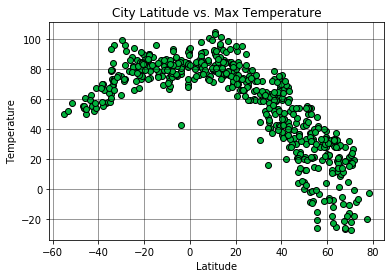

In [13]:
#plot lat vs max temp
lat = data['Lat']
temp = data['Max_Temp']

#create a grid and scatter plot
plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(lat,temp,c='#00b33c', edgecolors = 'black')

#arrange tick marks to have a 20 step so xaxis numbers are visable
plt.xticks(np.arange(-60, 100, step=20))

#label x and y axis; label title
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs. Max Temperature')

plt.show()

#### Latitude vs. Humidity Plot

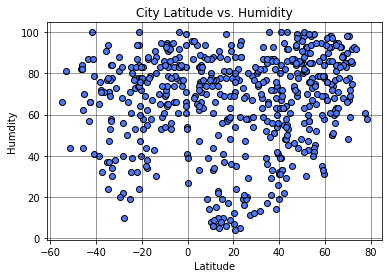

In [14]:
#plot lat vs humidity 
humid = data['Humidity']

plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(lat,humid,c='#4d79ff', edgecolors = 'black')
plt.xticks(np.arange(-60, 100, step=20))
plt.xlabel('Latitude')
plt.ylabel('Humdity')
plt.title('City Latitude vs. Humidity')

plt.show()

#### Latitude vs. Cloudiness Plot

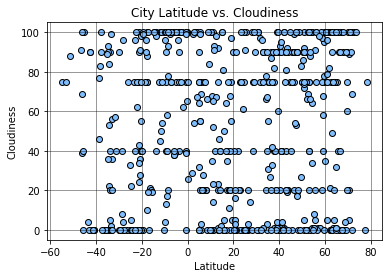

In [15]:
#plot lat vs cloud
cloud = data['Cloudiness']

plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(lat,cloud,c='#80bfff', edgecolors = 'black')
plt.xticks(np.arange(-60, 100, step=20))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

plt.show()

#### Latitude vs. Wind Speed Plot

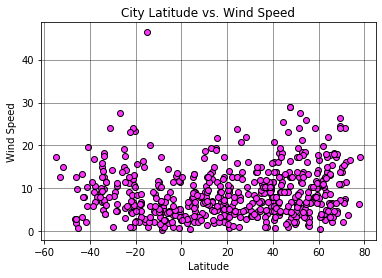

In [16]:
#plot lat vs wind spd

wind = data['Wind_Speed']

plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(lat,wind,c='#ff33ff', edgecolors = 'black')
plt.xticks(np.arange(-60, 100, step=20))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')

plt.show()

## Linear Regression

In [6]:
# Create Northern and Southern Hemisphere DataFrames
# Used loc to separate between positive and negative numbers (north and south hemi.)
north = data.loc[data["Lat"] >= 0, :]
south = data.loc[data["Lat"] <= 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8759807023567756


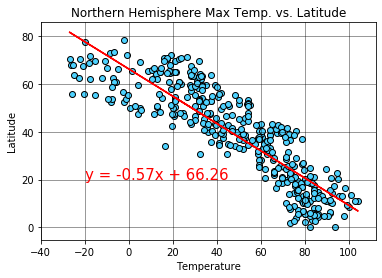

In [7]:
#plot scatter of lat vs max temp
temp_n = north['Max_Temp']
lat_n = north['Lat']

#assign variables via lineregress function
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(temp_n, lat_n)

#create the regression line
vc_fit = vc_slope * temp_n + vc_int

#line_eq is what will be displayed on the graph
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

#plot the regression line as a line graph
plt.plot(temp_n,vc_fit,"r-")

#add annotation based off line equation we made above with line_eq
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

#create scatter plot
plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(temp_n,lat_n,c='#4dd2ff', edgecolors = 'black')
plt.xticks(np.arange(-40, 120, step=20))
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Max Temp. vs. Latitude')

#display r-squared
print(f"The r-squared is: {vc_r}")


plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6067729463253078


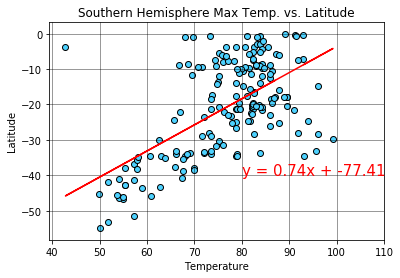

In [37]:
#plot scatter of lat vs max temp
temp_s = south['Max_Temp']
lat_s = south['Lat']

#assign variables via lineregress function
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(temp_s, lat_s)

#create the regression line
vc_fit = vc_slope * temp_s + vc_int

#line_eq is what will be displayed on the graph
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

#plot the regression line as a line graph
plt.plot(temp_s,vc_fit,"r-")

#add annotation based off line equation we made above with line_eq
plt.annotate(line_eq,(80,-40),fontsize=15,color="red")

#create scatter plot
plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(temp_s,lat_s,c='#4dd2ff', edgecolors = 'black')
plt.xticks(np.arange(40, 120, step=10))
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Max Temp. vs. Latitude')

#display r-squared
print(f"The r-squared is: {vc_r}")


plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2928983503356375


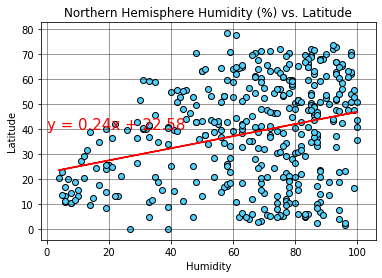

In [14]:
#plot scatter of lat vs humidity
humid_n = north['Humidity']

#assign variables via lineregress function
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(humid_n, lat_n)

#create the regression line
vc_fit = vc_slope * humid_n + vc_int

#line_eq is what will be displayed on the graph
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

#plot the regression line as a line graph
plt.plot(humid_n,vc_fit,"r-")

#add annotation based off line equation we made above with line_eq
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

#create scatter plot
plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(humid_n,lat_n,c='#4dd2ff', edgecolors = 'black')
plt.xticks(np.arange(0, 120, step=20))
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Humidity (%) vs. Latitude')

#display r-squared
print(f"The r-squared is: {vc_r}")


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21711562810496413


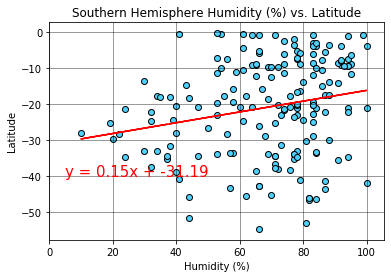

In [15]:
#plot scatter of humidity vs lat
humid_s = south['Humidity']

#assign variables via lineregress function
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(humid_s, lat_s)

#create the regression line
vc_fit = vc_slope * humid_s + vc_int

#line_eq is what will be displayed on the graph
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

#plot the regression line as a line graph
plt.plot(humid_s,vc_fit,"r-")

#add annotation based off line equation we made above with line_eq
plt.annotate(line_eq,(5,-40),fontsize=15,color="red")

#create scatter plot
plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(humid_s,lat_s,c='#4dd2ff', edgecolors = 'black')
plt.xticks(np.arange(0, 120, step=20))
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Humidity (%) vs. Latitude')

#display r-squared
print(f"The r-squared is: {vc_r}")


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13616674127835557


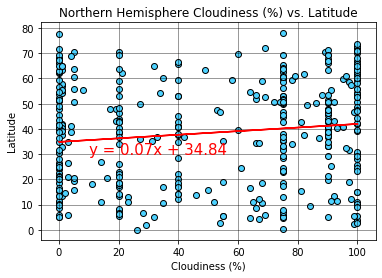

In [18]:
#plot scatter of cloudiness vs lat
cloud_n = north['Cloudiness']

#assign variables via lineregress function
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(cloud_n, lat_n)

#create the regression line
vc_fit = vc_slope * cloud_n + vc_int

#line_eq is what will be displayed on the graph
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

#plot the regression line as a line graph
plt.plot(cloud_n,vc_fit,"r-")

#add annotation based off line equation we made above with line_eq
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

#create scatter plot
plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(cloud_n,lat_n,c='#4dd2ff', edgecolors = 'black')
plt.xticks(np.arange(0, 120, step=20))
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Cloudiness (%) vs. Latitude')

#display r-squared
print(f"The r-squared is: {vc_r}")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3050861768391925


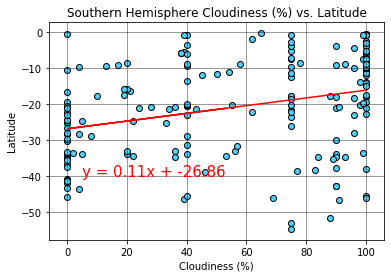

In [33]:
#plot scatter of humidity vs lat
cloud_s = south['Cloudiness']

#assign variables via lineregress function
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(cloud_s, lat_s)

#create the regression line
vc_fit = vc_slope * cloud_s + vc_int

#line_eq is what will be displayed on the graph
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

#plot the regression line as a line graph
plt.plot(cloud_s,vc_fit,"r-")

#add annotation based off line equation we made above with line_eq
plt.annotate(line_eq,(5,-40),fontsize=15,color="red")

#create scatter plot
plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(cloud_s,lat_s,c='#4dd2ff', edgecolors = 'black')
plt.xticks(np.arange(0, 120, step=20))
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Cloudiness (%) vs. Latitude')

#display r-squared
print(f"The r-squared is: {vc_r}")


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21018478886185116


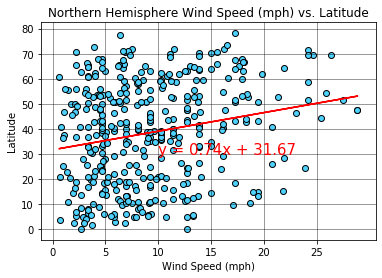

In [25]:
#plot scatter of cloudiness vs lat
wind_n = north['Wind_Speed']

#assign variables via lineregress function
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(wind_n, lat_n)

#create the regression line
vc_fit = vc_slope * wind_n + vc_int

#line_eq is what will be displayed on the graph
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

#plot the regression line as a line graph
plt.plot(wind_n,vc_fit,"r-")

#add annotation based off line equation we made above with line_eq
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

#create scatter plot
plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(wind_n,lat_n,c='#4dd2ff', edgecolors = 'black')
plt.xticks(np.arange(0, 30, step=5))
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Wind Speed (mph) vs. Latitude')

#display r-squared
print(f"The r-squared is: {vc_r}")


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23123700364858013


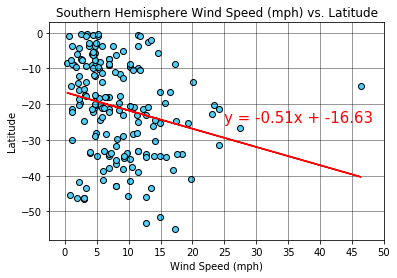

In [32]:
#plot scatter of humidity vs lat
wind_s = south['Wind_Speed']

#assign variables via lineregress function
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(wind_s, lat_s)

#create the regression line
vc_fit = vc_slope * wind_s + vc_int

#line_eq is what will be displayed on the graph
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

#plot the regression line as a line graph
plt.plot(wind_s,vc_fit,"r-")

#add annotation based off line equation we made above with line_eq
plt.annotate(line_eq,(25,-25),fontsize=15,color="red")

#create scatter plot
plt.grid(color = 'black',alpha = .5, axis='both')
plt.scatter(wind_s,lat_s,c='#4dd2ff', edgecolors = 'black')
plt.xticks(np.arange(0, 55, step=5))
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Wind Speed (mph) vs. Latitude')

#display r-squared
print(f"The r-squared is: {vc_r}")


plt.show()